<a href="https://colab.research.google.com/github/corrosivelogic/S23DR/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+http://hf.co/usm3d/tools.git

  Cloning http://hf.co/usm3d/tools.git to /tmp/pip-req-build-y9qfq9gq
  Running command git clone --filter=blob:none --quiet http://hf.co/usm3d/tools.git /tmp/pip-req-build-y9qfq9gq
  Resolved http://hf.co/usm3d/tools.git to commit b513ce346a104ad968fb637010818fc13e7c2164
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.7/694.7 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import webdataset as wds
import numpy as np
from huggingface_hub import hf_hub_download
from hoho import proc
from tqdm import tqdm
import sys
sys.path.append('..')
from solution_utilities import *


# Load training data




In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
# One shard of the dataset
dataset = wds.WebDataset(hf_hub_download(repo_id='usm3d/hoho-train-set',
            filename='data/train/hoho_v3_000-of-032.tar.gz',
            repo_type="dataset"))

dataset = dataset.decode()
dataset = dataset.map(proc)

for entry in dataset:
    human_entry = convert_entry_to_human_readable(entry)
    print (entry.keys())
    break


GatedRepoError: 403 Client Error. (Request ID: Root=1-6672e476-3bb01f412f2abcb84d0d370f;391c13cc-8805-40d8-97e4-25f9f152b7c3)

Cannot access gated repo for url https://huggingface.co/datasets/usm3d/hoho-train-set/resolve/main/data/train/hoho_v3_000-of-032.tar.gz.
Your request to access dataset usm3d/hoho-train-set is awaiting a review from the repo authors.

In [ ]:
# Download all the datasets:
for i in range(32):
    dataset = wds.WebDataset(hf_hub_download(repo_id='usm3d/hoho-train-set',
            filename=f'data/train/hoho_v3_{str(i).zfill(3)}-of-032.tar.gz',
            repo_type="dataset"))

In [ ]:
human_entry['points3d'][1781]

Point3D(id=1781, xyz=array([ 473.37884828, -241.57801038,  361.3271347 ]), rgb=array([123, 142, 143]), error=array(1.10828705), image_ids=array([6, 7]), point2D_idxs=array([7917, 3222]))

# Visualizing inputs

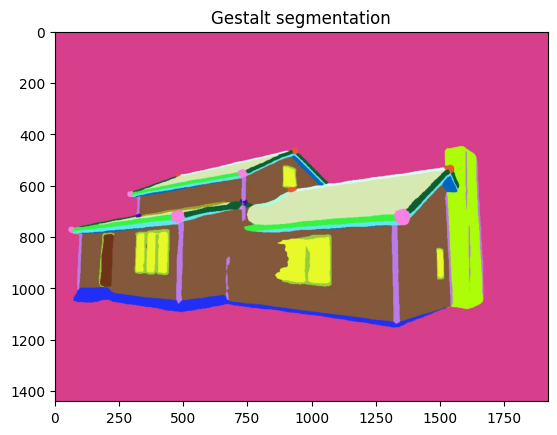

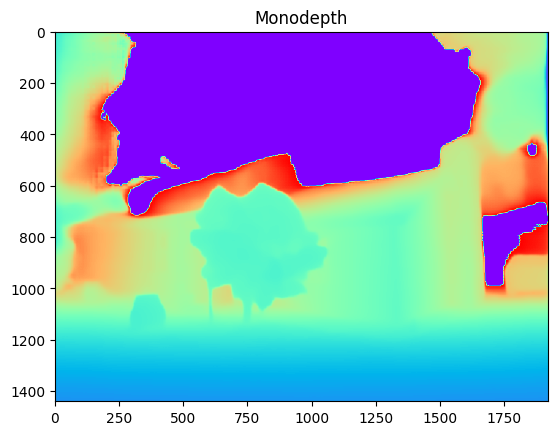

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(human_entry['gestalt'][0])
plt.title('Gestalt segmentation')

plt.figure()
depth = np.array(human_entry['depthcm'][0])/100.
depth[depth>20] = 0
depth = depth/depth.max()
plt.title('Monodepth')
plt.imshow(depth, cmap='rainbow')


In [ ]:
# Here is the prediction and visualization of single entry
key, vertices, edges = predict(entry, visualize=True)

In [ ]:
from hoho import compute_WED

compute_WED(vertices,
            edges,
            np.array(entry['wf_vertices']),
            np.array(entry['wf_edges']),
            cv=1, ce=1)

1.6093560850517319

In [ ]:
compute_WED(vertices,
            edges,
            np.array(entry['wf_vertices']),
            np.array(entry['wf_edges']),
            cv=438, ce=1)

166.98052955030022